Precision is given by
$\displaystyle \frac{TP}{TP+FP}$

Recall is given by
$\displaystyle \frac{TP}{TP+FN}$

For each year, suppose we choose $n$ movies to be chosen, where $n$ varies from 0 to the number of movies produced that year.  Then, pick the max recall and precision for each year.  Take the average of those to find our baseline.

In [41]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score
import math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
main2=pd.read_pickle('Data/Data_from_imdb_onehot1.pkl')

Let $n$ be the number of movies we pick to be nominees, and $k$ be the number of movies.

Expected $TP$ value is $\displaystyle \sum_{i=0}^n i \cdot P_i$ where $P_i$ is the probability that we chose $i$ correctly.

Then, $\displaystyle P_i = \frac{\binom{n}{i} \binom{k-n}{n-i}}{\binom{k}{n}}$

In [29]:
final_precs=[]
final_recs=[]
best_prec=[]
best_rec=[]
for y in range(2001,2022):
    #Find k and n
    k=0
    m=0
    for j in range(len(main2)):
        if main2.iloc[j]['year']== y:
            k=k+1
            if main2.iloc[j]['is_nominee'] ==1:
                m=m+1
    #Now, k is the number of movies in year=y
    #     and m is the number of nominees in year=y
    print(m)
    
    #Make an array of TP's for values of n from 0 to m
    exp_TP = []
    for n in range(m+1):
        exp_val=0
        for i in range(n+1):
            exp_val=exp_val +i* math.comb(n,i)*math.comb(k-n,n-i)/math.comb(k,n)
        exp_TP.append(exp_val)
        
    precisions=[exp_TP[x]/x for x in range(1,len(exp_TP))]
    recalls = [exp_TP[x]/m for x in range(1,len(exp_TP))]
    #This ignores when x=0, but we know that precision and recall is non-negative
    best_prec.append(precisions.index(max(precisions))+1)
    best_rec.append(recalls.index(max(recalls))+1)
    final_precs.append(max(precisions))
    final_recs.append(max(recalls))
    
            
    

4
4
3
4
2
3
3
3
5
5
3
6
6
5
3
5
5
5
6
4
5


In [23]:
best_prec

[4, 4, 3, 4, 2, 3, 3, 3, 5, 5, 3, 6, 6, 5, 3, 5, 5, 5, 6, 4, 5]

In [24]:
best_rec

[4, 4, 3, 4, 2, 3, 3, 3, 5, 5, 3, 6, 6, 5, 3, 5, 5, 5, 6, 4, 5]

The best precision and recall come when $n=m$. Thus, we should choose the number of movies that will be nominated.

In [27]:
final_precs

[0.06249999999999999,
 0.0606060606060606,
 0.04285714285714285,
 0.052631578947368425,
 0.024096385542168676,
 0.02586206896551724,
 0.022900763358778622,
 0.0234375,
 0.0352112676056338,
 0.028735632183908046,
 0.013698630136986302,
 0.02912621359223301,
 0.02985074626865672,
 0.02232142857142857,
 0.011904761904761904,
 0.02100840336134454,
 0.018867924528301886,
 0.017421602787456445,
 0.015789473684210527,
 0.014981273408239699,
 0.016025641025641024]

In [28]:
final_recs

[0.06249999999999999,
 0.0606060606060606,
 0.04285714285714285,
 0.052631578947368425,
 0.024096385542168676,
 0.02586206896551724,
 0.022900763358778622,
 0.0234375,
 0.0352112676056338,
 0.028735632183908046,
 0.013698630136986302,
 0.02912621359223301,
 0.02985074626865672,
 0.02232142857142857,
 0.011904761904761904,
 0.02100840336134454,
 0.018867924528301886,
 0.017421602787456445,
 0.015789473684210527,
 0.014981273408239699,
 0.016025641025641024]

Now, let's graph the expected precisions and recalls, and the averages, for the years in our validation sets.

In [51]:
val_precs=final_precs[12:17]

In [56]:
val_recs=final_recs[12:17]

In [52]:
val_precs

[0.02985074626865672,
 0.02232142857142857,
 0.011904761904761904,
 0.02100840336134454,
 0.018867924528301886]

In [53]:
ave=np.mean(val_precs)
val_precs.append(ave)

In [54]:
val_precs

[0.02985074626865672,
 0.02232142857142857,
 0.011904761904761904,
 0.02100840336134454,
 0.018867924528301886,
 0.020790652926898724]

In [57]:
ave=np.mean(val_recs)
val_recs.append(ave)


In [58]:
val_recs

[0.02985074626865672,
 0.02232142857142857,
 0.011904761904761904,
 0.02100840336134454,
 0.018867924528301886,
 0.020790652926898724]

It makes sense that precision and recall are the same because the number that we're predicting matches the actual.

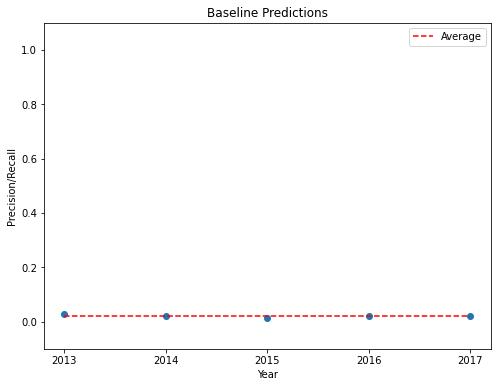

In [70]:
plt.figure(figsize=(8,6))

plt.scatter(['2013','2014','2015','2016','2017'], val_recs[:-1])
plt.plot(['2013','2017'],[val_recs[5], val_recs[5]], '--', color='red', label='Average')

plt.legend()

plt.ylim(-0.1,1.1)
plt.title('Baseline Predictions')
plt.ylabel('Precision/Recall')
plt.xlabel('Year')

plt.show()